In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, root_mean_squared_error, r2_score
import seaborn as sns

In [14]:
df = pd.read_csv('current_nba_players.csv')
X = df.select_dtypes(include=[np.number])
X = X.drop(columns=['Unnamed: 0', 'jersey', 'weight_lbs'])
features = X.columns
y = df['position_1']
y = y.map({'PG': 0, 'SG': 1, 'SF': 2, 'PF': 3, 'C': 4})
pipe = Pipeline([('scaler', StandardScaler()), ('impute', SimpleImputer(strategy='median'))])
X = pipe.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=253)


c:\Users\caleb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\caleb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters for Logistic Regression: {'max_iter': 50, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.6776371308016877
Logistic Regression Accuracy: 0.5909090909090909


c:\Users\caleb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


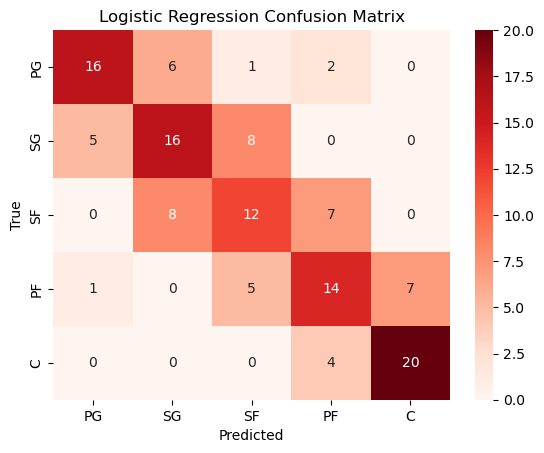

In [16]:
param_grid_lr = {
    'max_iter': [50, 1000, 10000],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
}
grid_search_lr = GridSearchCV(LogisticRegression(multi_class="multinomial", random_state=253), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

best_lr = grid_search_lr.best_estimator_
y_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['PG', 'SG', 'SF', 'PF', 'C'], yticklabels=['PG', 'SG', 'SF', 'PF', 'C'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



c:\Users\caleb\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\caleb\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\caleb\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\caleb\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\caleb\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\caleb\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best parameters for Logistic Regression: {'C': 1, 'max_iter': 50, 'penalty': 'l1'}
Best score for Logistic Regression: 0.7004219409282699
Logistic Regression Accuracy: 0.6363636363636364


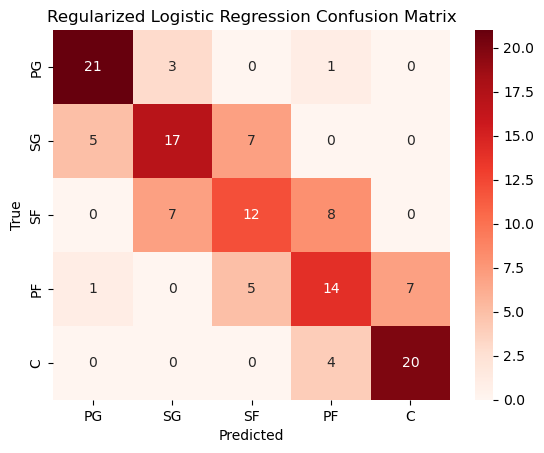

In [17]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [50, 100, 1000],
    'penalty': ['l1', 'l2'],
}
grid_search_lr = GridSearchCV(LogisticRegression(multi_class="multinomial", solver='saga', penalty='l1'), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

best_lrr = grid_search_lr.best_estimator_
y_pred = best_lrr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['PG', 'SG', 'SF', 'PF', 'C'], yticklabels=['PG', 'SG', 'SF', 'PF', 'C'])
plt.title('Regularized Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Best parameters for Random Forest: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest: 0.7233041220382993
Random Forest Accuracy: 0.6666666666666666


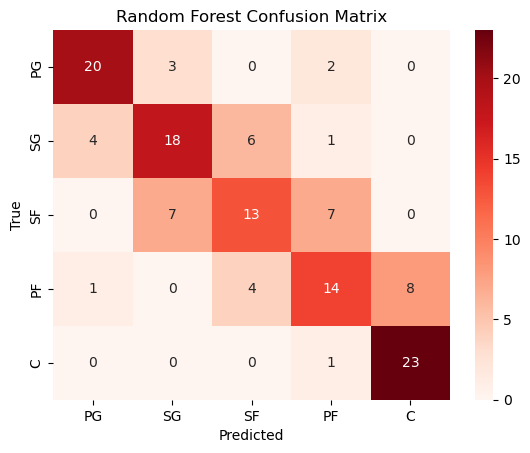

In [ ]:
rf = RandomForestClassifier(random_state=253)
param_grid_rf = {
    'n_estimators': [50, 100, 150, 250],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['PG', 'SG', 'SF', 'PF', 'C'], yticklabels=['PG', 'SG', 'SF', 'PF', 'C'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Best parameters for KNN: {'n_neighbors': 20, 'weights': 'distance'}
Best score for KNN: 0.6625446283674131
KNN Accuracy: 0.6363636363636364
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.69        25
           1       0.57      0.59      0.58        29
           2       0.52      0.52      0.52        27
           3       0.60      0.56      0.58        27
           4       0.81      0.88      0.84        24

    accuracy                           0.64       132
   macro avg       0.64      0.64      0.64       132
weighted avg       0.63      0.64      0.63       132



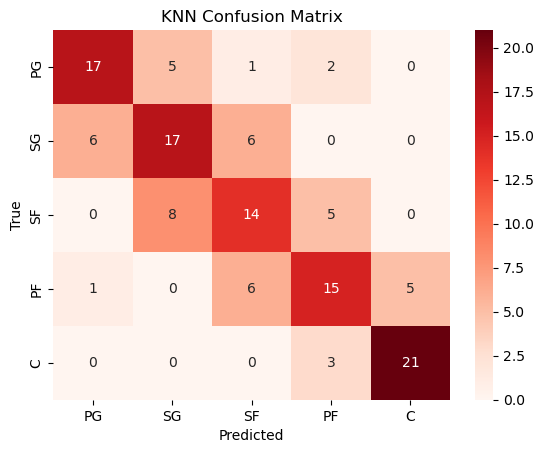

In [19]:
# KNN Classifier
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 10, 20, 50],
    'weights': ['uniform', 'distance'],
}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)
best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['PG', 'SG', 'SF', 'PF', 'C'], yticklabels=['PG', 'SG', 'SF', 'PF', 'C'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

classes = [0, 1, 2, 3, 4]
y_test_bin = label_binarize(y_test, classes=classes)

models = {
    'Logistic Regression': best_lr,
    'Regularized Logistic Regression': best_lrr,
    'Random Forest': best_rf,
    'KNN': best_knn
}

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)
    auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
    print(f"{name} AUC: {auc:.4f}")

Logistic Regression AUC: 0.8847
Regularized Logistic Regression AUC: 0.8917
Random Forest AUC: 0.9052
KNN AUC: 0.8961


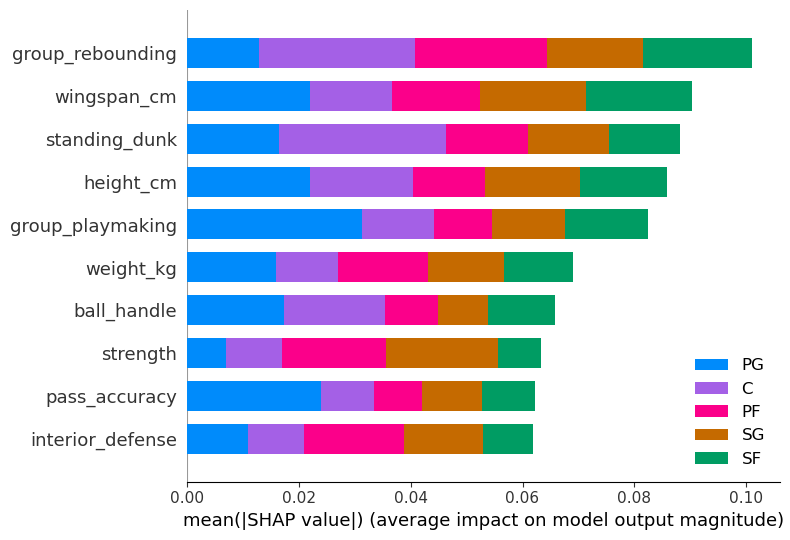

In [34]:
import shap
#shap for best logistic regression model

explainer = shap.Explainer(best_rf, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test, check_additivity=False)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=10, feature_names=features, class_names=['PG', 'SG', 'SF', 'PF', 'C'], show=True,
                      title="SHAP Summary Plot for Random Forest Classifier")